# 📊 Complete EDA Visualization Guide

This notebook demonstrates all the essential visualization types used in Exploratory Data Analysis (EDA) as outlined in the Data Science roadmap. We'll cover:

## 🎯 Visualization Categories:
1. **Distribution Analysis** - Histograms, Box plots, Violin plots, Density plots
2. **Relationship Analysis** - Scatter plots, Pair plots, Heatmaps, Joint plots  
3. **Categorical Analysis** - Bar plots, Count plots, Pie charts
4. **Time Series Analysis** - Line plots, Area plots
5. **Distribution & Skewness Analysis** - Statistical tests and Q-Q plots
6. **Advanced Correlation Visualization** - Enhanced heatmaps

Each section includes practical examples with real datasets and explains when to use each visualization type.

## 🚀 Quick Setup Instructions

**Before running this notebook for the first time:**
1. Make sure you have Python 3.7+ installed
2. The required packages will be automatically available in most data science environments
3. If you encounter import errors, run this in a cell: `%pip install pandas numpy matplotlib seaborn plotly scipy`

**Ready to explore? Let's start! 👇**

---

In [5]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from scipy import stats
from scipy.stats import norm, skew, kurtosis
import datetime

# Configure plotting settings
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set figure size defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("✅ All libraries imported successfully!")
print("📦 Available libraries: pandas, numpy, matplotlib, seaborn, plotly, scipy")
print("🎨 Plotting style configured")

✅ All libraries imported successfully!
📦 Available libraries: pandas, numpy, matplotlib, seaborn, plotly, scipy
🎨 Plotting style configured


## 📁 Load and Prepare Sample Datasets

We'll use multiple datasets to demonstrate different visualization techniques:
- **Tips Dataset**: Restaurant tips data for categorical and numerical analysis
- **Iris Dataset**: Classic flower dataset for relationship analysis
- **Flights Dataset**: Passenger numbers over time for time series analysis
- **Synthetic Data**: Custom generated data for specific examples

In [6]:
# Load Sample Datasets
print("Loading datasets...")

# 1. Tips dataset - Great for categorical analysis
tips = sns.load_dataset('tips')
print(f"✅ Tips dataset loaded: {tips.shape}")

# 2. Iris dataset - Perfect for relationship analysis
iris = sns.load_dataset('iris')
print(f"✅ Iris dataset loaded: {iris.shape}")

# 3. Flights dataset - Ideal for time series
flights = sns.load_dataset('flights')
print(f"✅ Flights dataset loaded: {flights.shape}")

# 4. Create synthetic time series data
np.random.seed(42)
dates = pd.date_range('2020-01-01', periods=365, freq='D')
ts_data = pd.DataFrame({
    'date': dates,
    'sales': 1000 + np.cumsum(np.random.randn(365) * 10) + 50 * np.sin(np.arange(365) * 2 * np.pi / 365),
    'marketing': 500 + np.cumsum(np.random.randn(365) * 5) + 25 * np.cos(np.arange(365) * 2 * np.pi / 365)
})
print(f"✅ Time series data created: {ts_data.shape}")

# 5. Create dataset with different distributions
np.random.seed(42)
dist_data = pd.DataFrame({
    'normal': np.random.normal(50, 15, 1000),
    'skewed_right': np.random.exponential(2, 1000),
    'skewed_left': 10 - np.random.exponential(2, 1000),
    'uniform': np.random.uniform(0, 100, 1000),
    'bimodal': np.concatenate([np.random.normal(30, 5, 500), np.random.normal(70, 5, 500)])
})
print(f"✅ Distribution data created: {dist_data.shape}")

print("\n📊 Datasets ready for visualization!")
print("\nDataset previews:")
print("\n1. Tips dataset:")
print(tips.head(3))
print(f"Columns: {list(tips.columns)}")

print("\n2. Iris dataset:")
print(iris.head(3))
print(f"Columns: {list(iris.columns)}")

print("\n3. Flights dataset:")
print(flights.head(3))

Loading datasets...
✅ Tips dataset loaded: (244, 7)
✅ Iris dataset loaded: (150, 5)
✅ Flights dataset loaded: (144, 3)
✅ Time series data created: (365, 3)
✅ Distribution data created: (1000, 5)

📊 Datasets ready for visualization!

Dataset previews:

1. Tips dataset:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
Columns: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

2. Iris dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

3. Flights dataset:
   year month  passengers
0  1949   Jan         112
1  1949   Feb 

## 📈 1. Distribution Analysis Plots

Distribution analysis helps us understand:
- **Shape** of our data (normal, skewed, bimodal)
- **Central tendency** (mean, median, mode)
- **Spread** (variance, range, quartiles)
- **Outliers** and extreme values

### 🎯 When to use each plot:
- **Histograms**: Show frequency distribution of numerical variables
- **Box plots**: Identify outliers, quartiles, and data spread  
- **Violin plots**: Combine box plots with kernel density estimation
- **Density plots**: Show smooth distribution curves

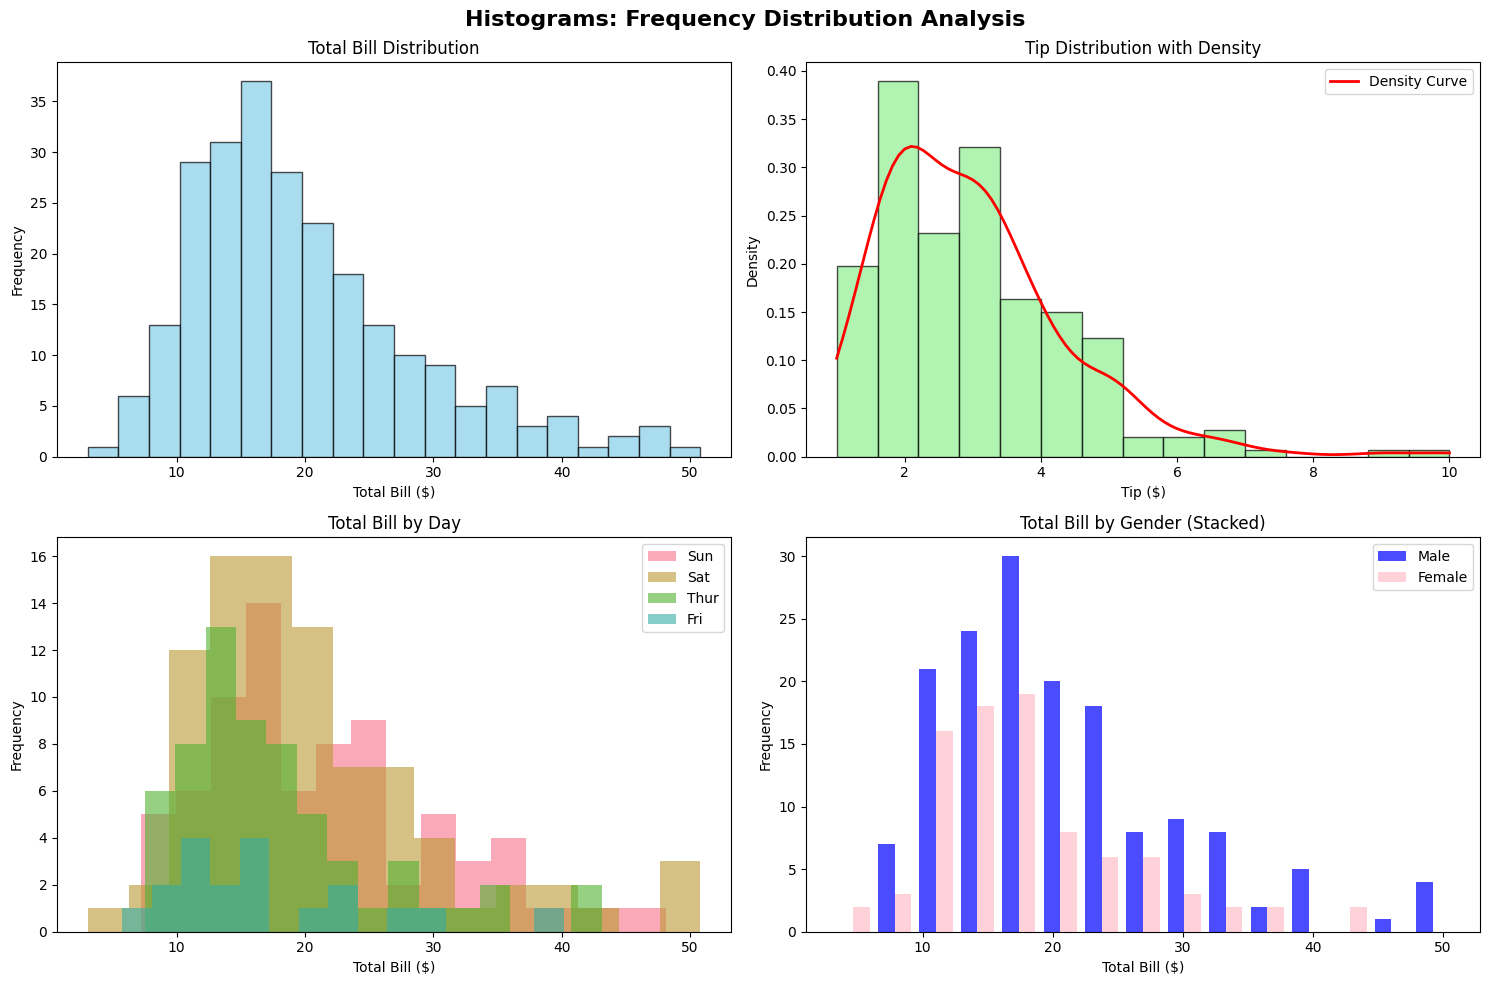

📊 Histograms show the frequency distribution of numerical variables
💡 Use histograms to identify data distribution patterns and potential outliers


In [7]:
### 📊 Histograms - Frequency Distribution

# Create subplots for multiple histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Histograms: Frequency Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Basic histogram
axes[0,0].hist(tips['total_bill'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Total Bill Distribution')
axes[0,0].set_xlabel('Total Bill ($)')
axes[0,0].set_ylabel('Frequency')

# 2. Histogram with density curve
axes[0,1].hist(tips['tip'], bins=15, alpha=0.7, color='lightgreen', density=True, edgecolor='black')
axes[0,1].set_title('Tip Distribution with Density')
axes[0,1].set_xlabel('Tip ($)')
axes[0,1].set_ylabel('Density')
# Add density curve
tip_values = np.linspace(tips['tip'].min(), tips['tip'].max(), 100)
axes[0,1].plot(tip_values, stats.gaussian_kde(tips['tip'])(tip_values), 'r-', lw=2, label='Density Curve')
axes[0,1].legend()

# 3. Grouped histogram
for day in tips['day'].unique():
    subset = tips[tips['day'] == day]['total_bill']
    axes[1,0].hist(subset, alpha=0.6, label=day, bins=15)
axes[1,0].set_title('Total Bill by Day')
axes[1,0].set_xlabel('Total Bill ($)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# 4. Stacked histogram
axes[1,1].hist([tips[tips['sex'] == 'Male']['total_bill'], 
                tips[tips['sex'] == 'Female']['total_bill']], 
               bins=15, alpha=0.7, label=['Male', 'Female'], color=['blue', 'pink'])
axes[1,1].set_title('Total Bill by Gender (Stacked)')
axes[1,1].set_xlabel('Total Bill ($)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print("📊 Histograms show the frequency distribution of numerical variables")
print("💡 Use histograms to identify data distribution patterns and potential outliers")

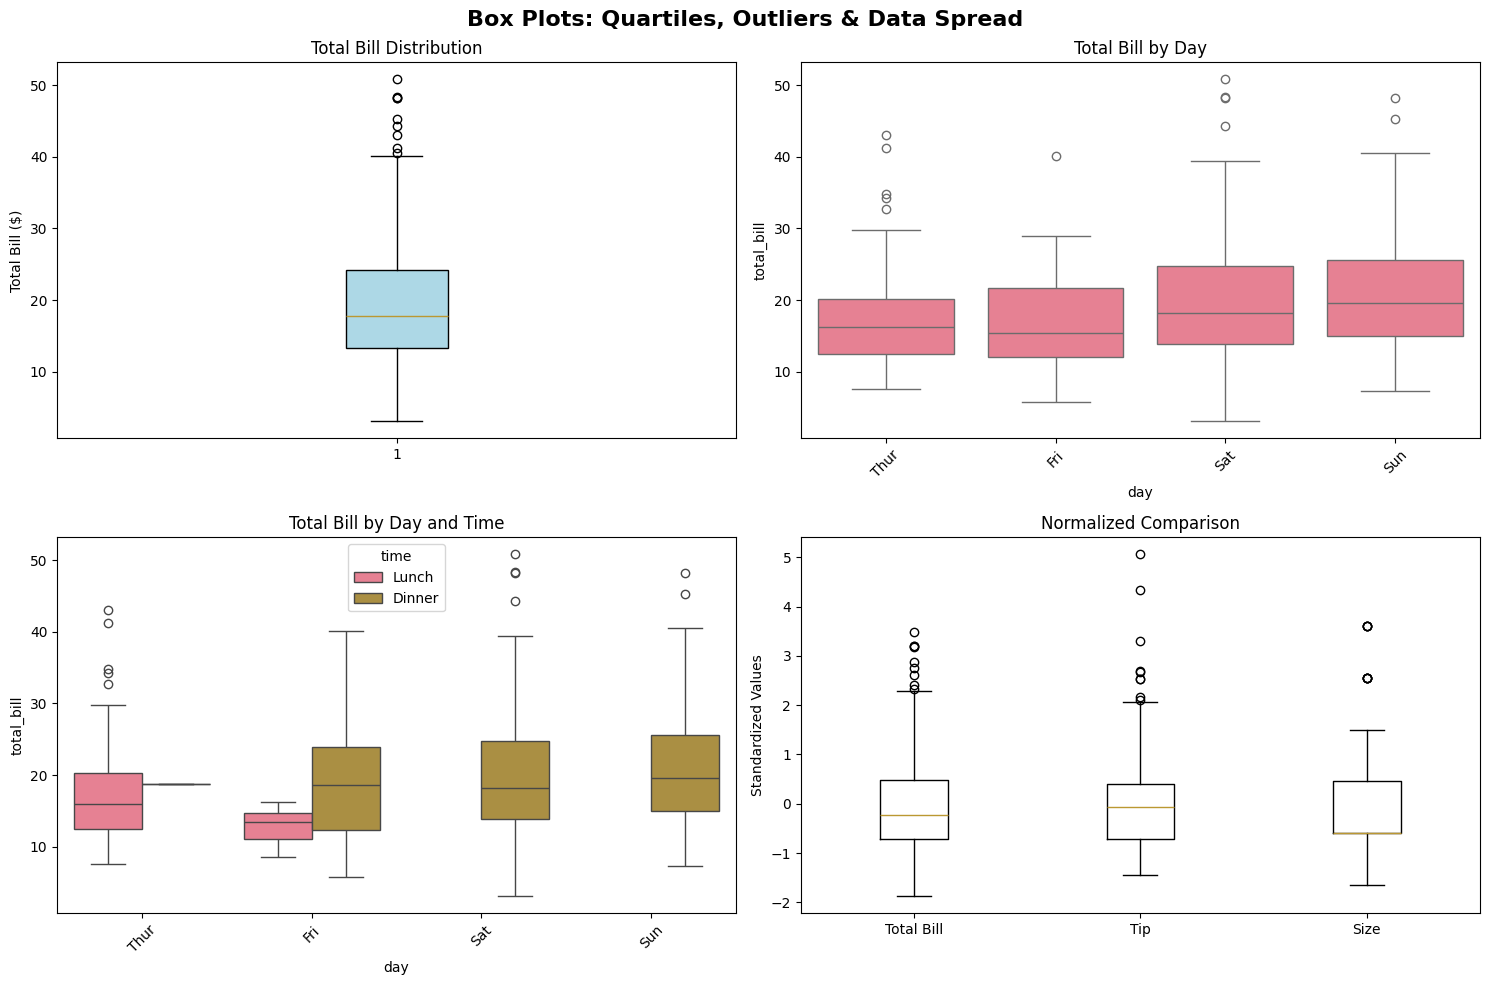

📦 Box plots reveal:
   • Median (Q2): $17.80
   • Q1 (25th percentile): $13.35
   • Q3 (75th percentile): $24.13
   • IQR: $10.78
   • Outliers detected: 9 values
💡 Use box plots to identify outliers and compare distributions across categories


In [8]:
### 📦 Box Plots - Quartiles and Outliers

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Box Plots: Quartiles, Outliers & Data Spread', fontsize=16, fontweight='bold')

# 1. Basic box plot
box1 = axes[0,0].boxplot(tips['total_bill'], patch_artist=True)
box1['boxes'][0].set_facecolor('lightblue')
axes[0,0].set_title('Total Bill Distribution')
axes[0,0].set_ylabel('Total Bill ($)')

# 2. Grouped box plot using seaborn
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[0,1])
axes[0,1].set_title('Total Bill by Day')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Box plot by multiple categories
sns.boxplot(data=tips, x='day', y='total_bill', hue='time', ax=axes[1,0])
axes[1,0].set_title('Total Bill by Day and Time')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Multiple variables box plot
tips_numeric = tips[['total_bill', 'tip', 'size']].copy()
# Normalize for comparison
tips_normalized = (tips_numeric - tips_numeric.mean()) / tips_numeric.std()
axes[1,1].boxplot([tips_normalized['total_bill'], tips_normalized['tip'], tips_normalized['size']], 
                  labels=['Total Bill', 'Tip', 'Size'])
axes[1,1].set_title('Normalized Comparison')
axes[1,1].set_ylabel('Standardized Values')

plt.tight_layout()
plt.show()

# Show outlier information
Q1 = tips['total_bill'].quantile(0.25)
Q3 = tips['total_bill'].quantile(0.75)
IQR = Q3 - Q1
outliers = tips[(tips['total_bill'] < Q1 - 1.5*IQR) | (tips['total_bill'] > Q3 + 1.5*IQR)]

print("📦 Box plots reveal:")
print(f"   • Median (Q2): ${tips['total_bill'].median():.2f}")
print(f"   • Q1 (25th percentile): ${Q1:.2f}")
print(f"   • Q3 (75th percentile): ${Q3:.2f}")
print(f"   • IQR: ${IQR:.2f}")
print(f"   • Outliers detected: {len(outliers)} values")
print("💡 Use box plots to identify outliers and compare distributions across categories")

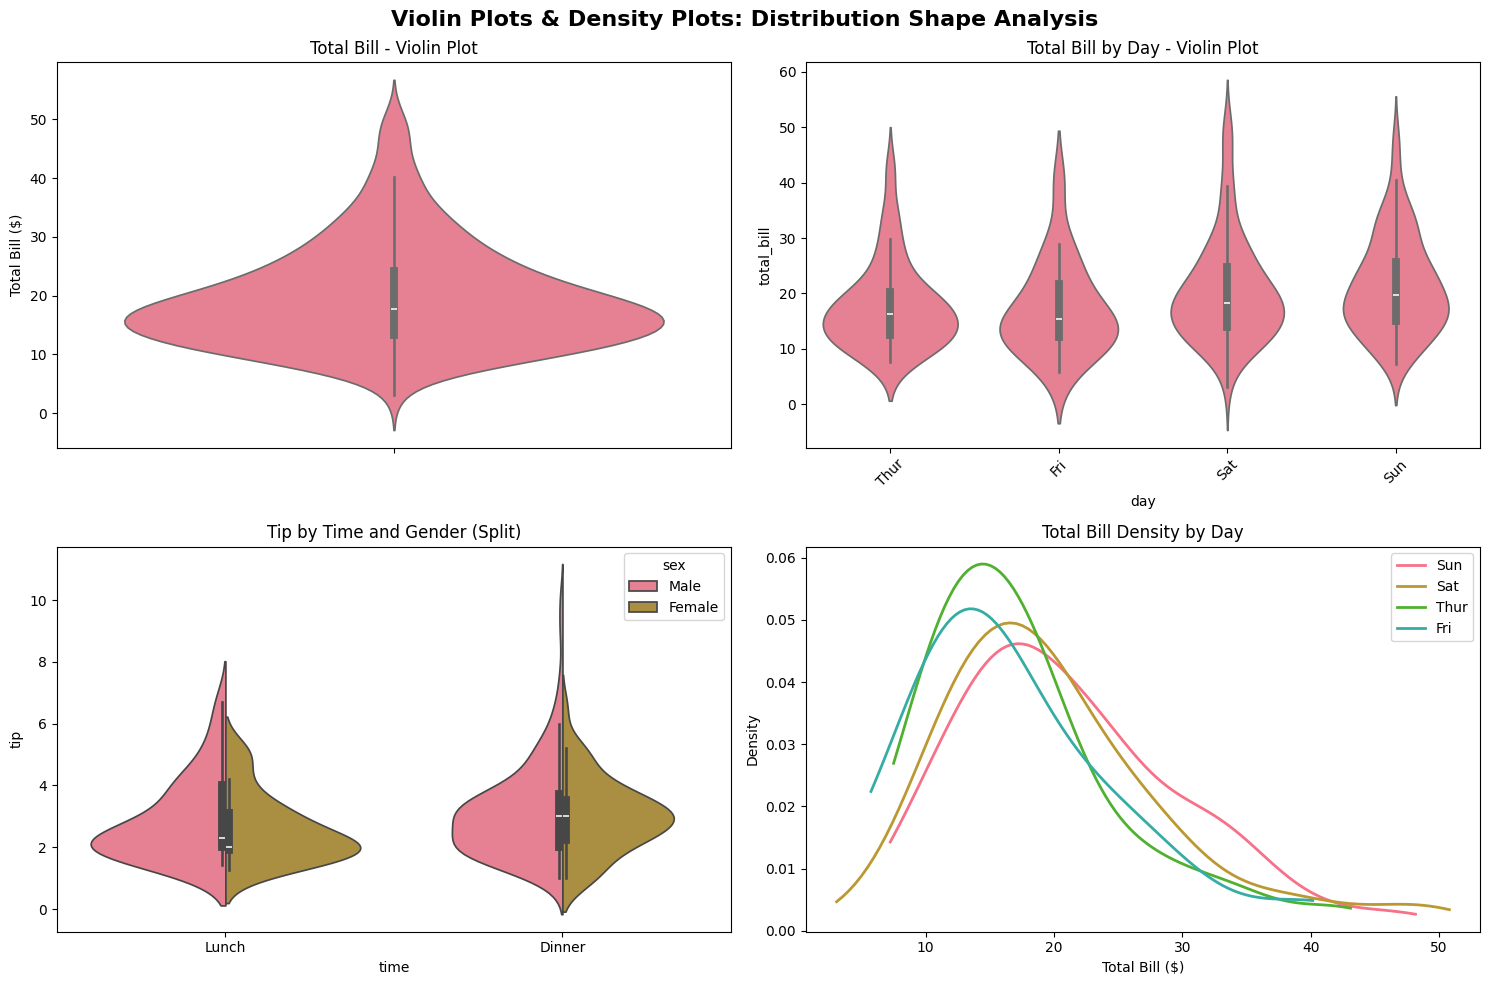

🎻 Violin plots combine box plots with kernel density estimation
📊 Density plots show smooth distribution curves
💡 Use violin plots to see both summary statistics and distribution shape
💡 Use density plots to compare multiple distributions smoothly


In [9]:
### 🎻 Violin Plots & 📊 Density Plots

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Violin Plots & Density Plots: Distribution Shape Analysis', fontsize=16, fontweight='bold')

# 1. Basic violin plot
sns.violinplot(data=tips, y='total_bill', ax=axes[0,0])
axes[0,0].set_title('Total Bill - Violin Plot')
axes[0,0].set_ylabel('Total Bill ($)')

# 2. Grouped violin plot
sns.violinplot(data=tips, x='day', y='total_bill', ax=axes[0,1])
axes[0,1].set_title('Total Bill by Day - Violin Plot')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Violin plot with inner quartiles
sns.violinplot(data=tips, x='time', y='tip', hue='sex', split=True, ax=axes[1,0])
axes[1,0].set_title('Tip by Time and Gender (Split)')

# 4. Density plots
for day in tips['day'].unique():
    subset = tips[tips['day'] == day]['total_bill']
    axes[1,1].plot(np.linspace(subset.min(), subset.max(), 100),
                   stats.gaussian_kde(subset)(np.linspace(subset.min(), subset.max(), 100)),
                   label=day, linewidth=2)
axes[1,1].set_title('Total Bill Density by Day')
axes[1,1].set_xlabel('Total Bill ($)')
axes[1,1].set_ylabel('Density')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print("🎻 Violin plots combine box plots with kernel density estimation")
print("📊 Density plots show smooth distribution curves")
print("💡 Use violin plots to see both summary statistics and distribution shape")
print("💡 Use density plots to compare multiple distributions smoothly")

## 🔗 2. Relationship Analysis Plots

Relationship analysis reveals connections and patterns between variables:
- **Correlations** between numerical variables
- **Associations** in the data
- **Patterns** and **trends**
- **Clustering** of data points

### 🎯 When to use each plot:
- **Scatter plots**: Explore relationships between two continuous variables
- **Pair plots**: Matrix of scatter plots for multiple variables  
- **Heatmaps**: Visualize correlation matrices and pivot tables
- **Joint plots**: Combine scatter plots with marginal distributions

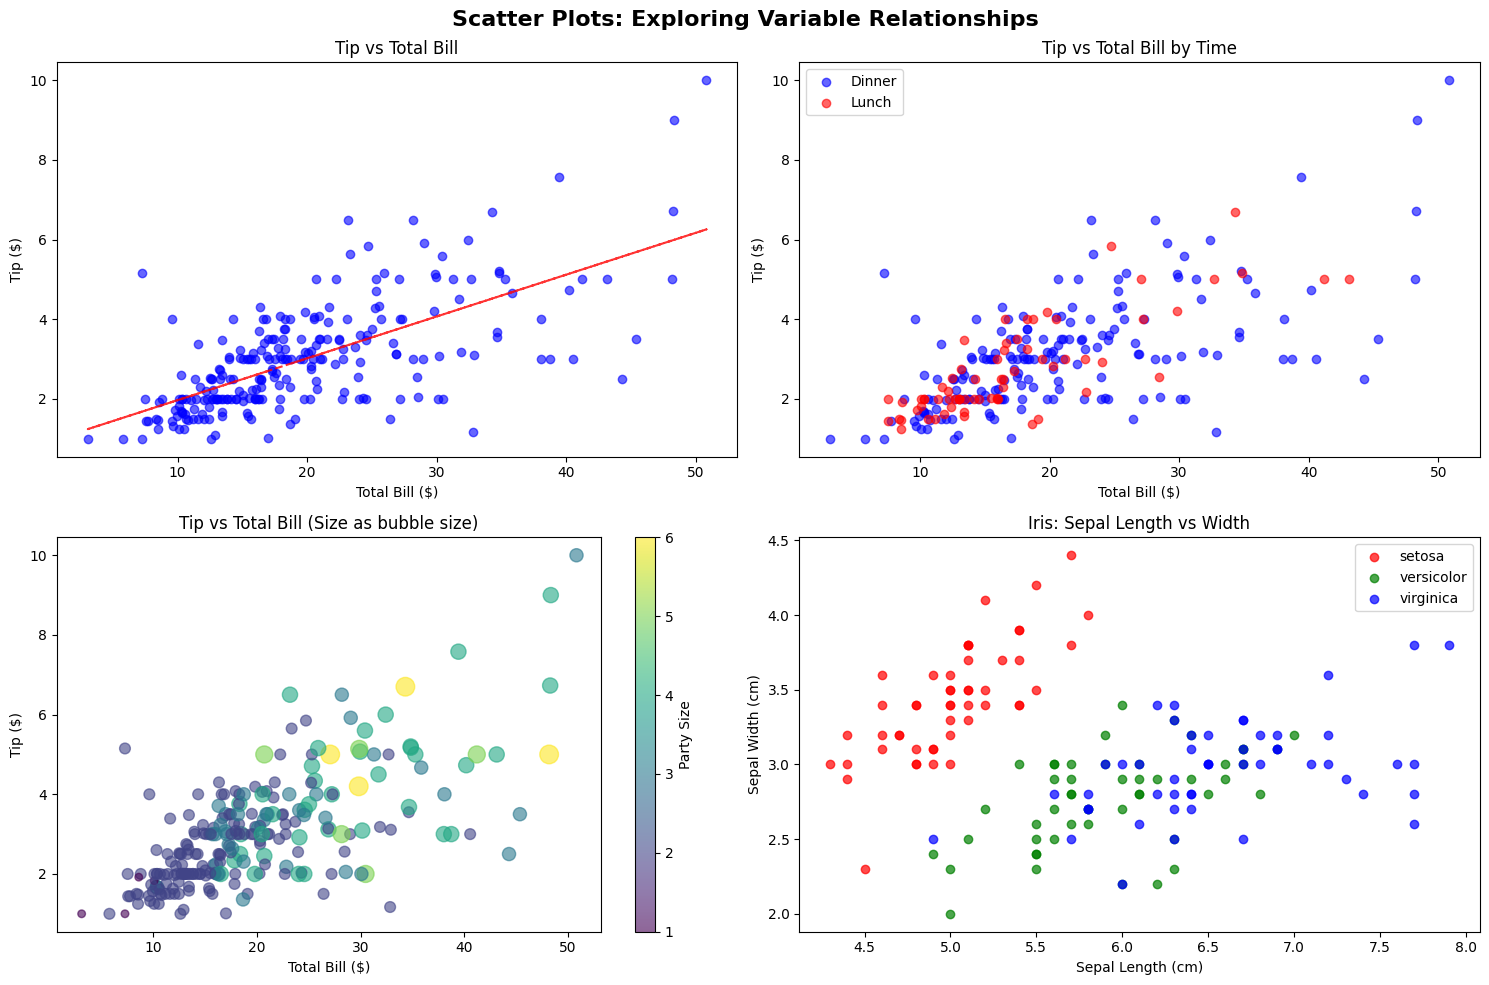

🔗 Correlation between Total Bill and Tip: 0.676
💡 Scatter plots reveal linear/non-linear relationships between variables
💡 Use color, size, and shape to add additional dimensions to the analysis


In [10]:
### 🔍 Scatter Plots - Variable Relationships

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Scatter Plots: Exploring Variable Relationships', fontsize=16, fontweight='bold')

# 1. Basic scatter plot
axes[0,0].scatter(tips['total_bill'], tips['tip'], alpha=0.6, color='blue')
axes[0,0].set_xlabel('Total Bill ($)')
axes[0,0].set_ylabel('Tip ($)')
axes[0,0].set_title('Tip vs Total Bill')

# Add trend line
z = np.polyfit(tips['total_bill'], tips['tip'], 1)
p = np.poly1d(z)
axes[0,0].plot(tips['total_bill'], p(tips['total_bill']), "r--", alpha=0.8)

# 2. Colored by category
colors = {'Lunch': 'red', 'Dinner': 'blue'}
for time_period in tips['time'].unique():
    subset = tips[tips['time'] == time_period]
    axes[0,1].scatter(subset['total_bill'], subset['tip'], 
                     label=time_period, alpha=0.6, color=colors[time_period])
axes[0,1].set_xlabel('Total Bill ($)')
axes[0,1].set_ylabel('Tip ($)')
axes[0,1].set_title('Tip vs Total Bill by Time')
axes[0,1].legend()

# 3. Size based on third variable
axes[1,0].scatter(tips['total_bill'], tips['tip'], 
                 s=tips['size']*30, alpha=0.6, c=tips['size'], cmap='viridis')
axes[1,0].set_xlabel('Total Bill ($)')
axes[1,0].set_ylabel('Tip ($)')
axes[1,0].set_title('Tip vs Total Bill (Size as bubble size)')
cbar = plt.colorbar(axes[1,0].collections[0], ax=axes[1,0])
cbar.set_label('Party Size')

# 4. Iris dataset scatter plot
species_colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
for species in iris['species'].unique():
    subset = iris[iris['species'] == species]
    axes[1,1].scatter(subset['sepal_length'], subset['sepal_width'], 
                     label=species, alpha=0.7, color=species_colors[species])
axes[1,1].set_xlabel('Sepal Length (cm)')
axes[1,1].set_ylabel('Sepal Width (cm)')
axes[1,1].set_title('Iris: Sepal Length vs Width')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = tips['total_bill'].corr(tips['tip'])
print(f"🔗 Correlation between Total Bill and Tip: {correlation:.3f}")
print("💡 Scatter plots reveal linear/non-linear relationships between variables")
print("💡 Use color, size, and shape to add additional dimensions to the analysis")

Creating Pair Plot...


<Figure size 1200x1000 with 0 Axes>

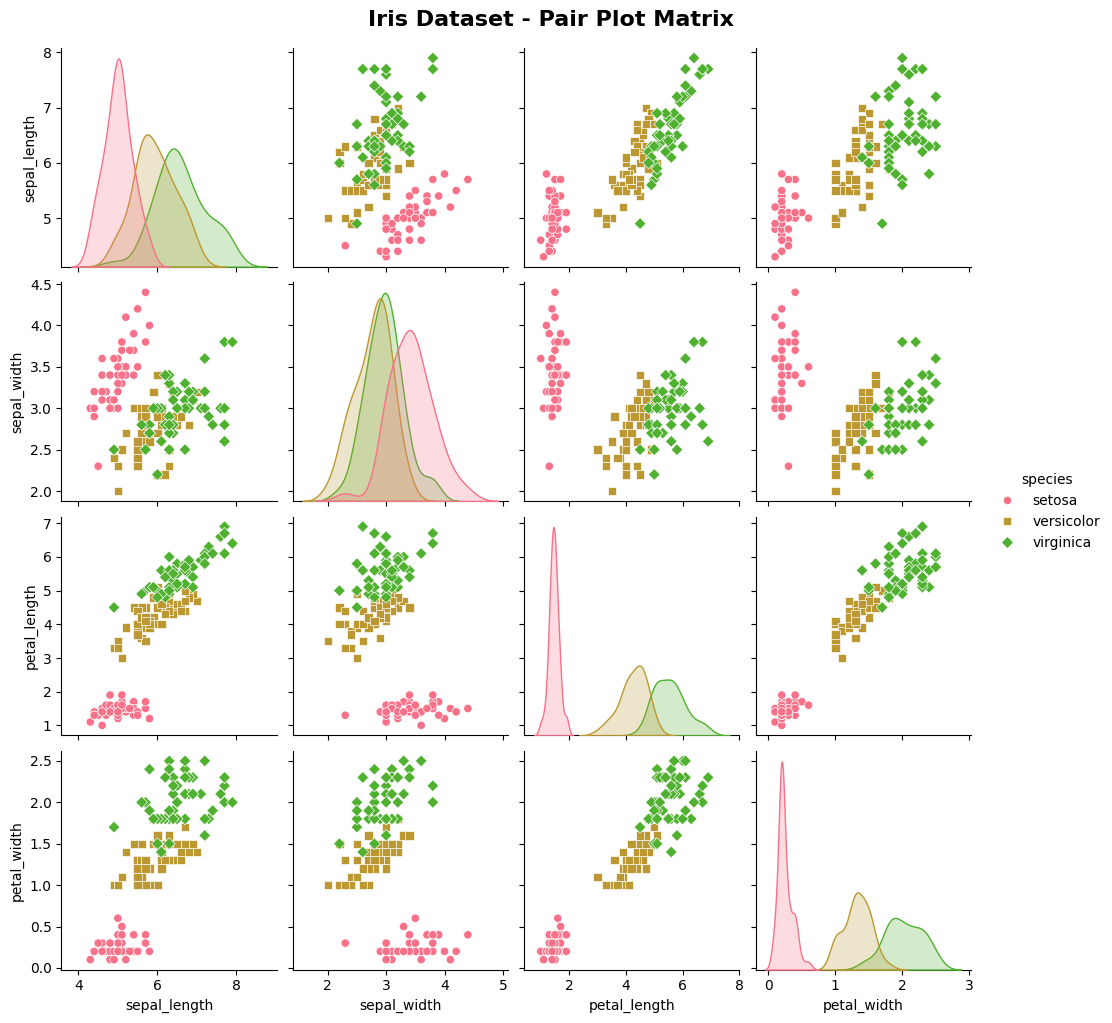

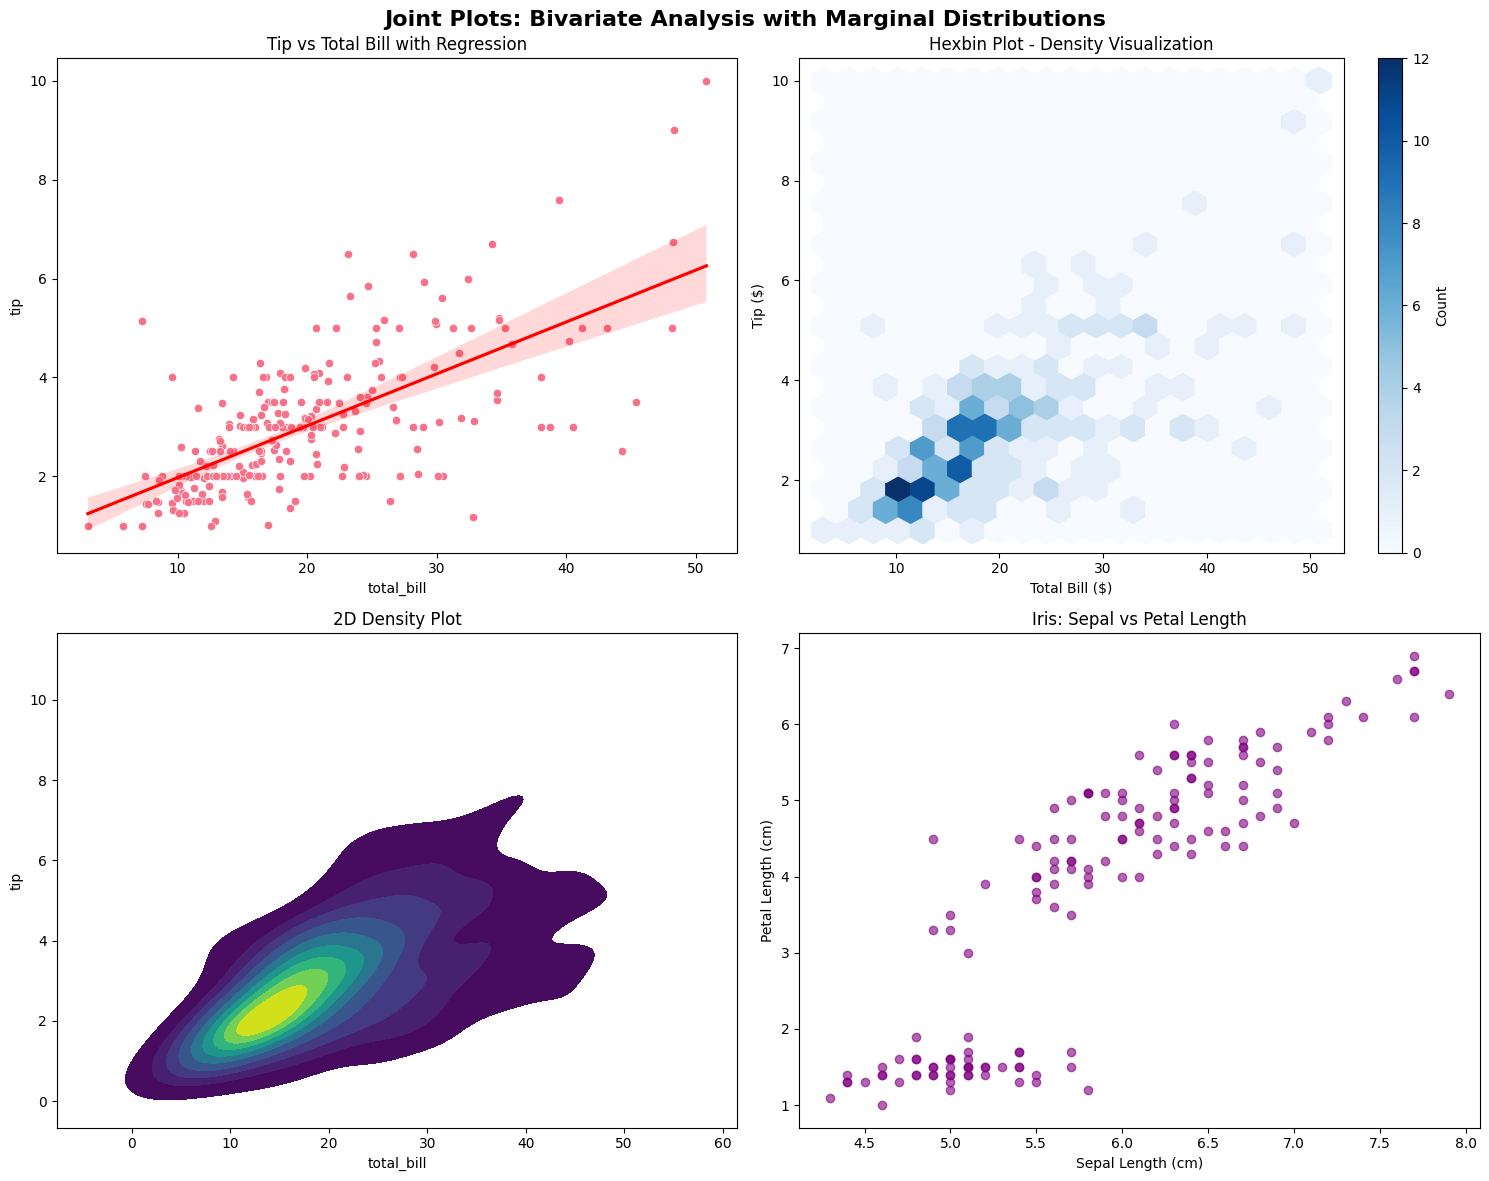

🔄 Pair plots show all pairwise relationships in a dataset
🎯 Joint plots combine scatter plots with marginal distributions
💡 Use pair plots for quick overview of multi-variable relationships
💡 Use joint plots for detailed analysis of two specific variables


In [11]:
### 🔄 Pair Plots & Joint Plots

# 1. Pair Plot - Matrix of relationships
print("Creating Pair Plot...")
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
pair_plot.fig.suptitle('Iris Dataset - Pair Plot Matrix', y=1.02, fontsize=16, fontweight='bold')
plt.show()

# 2. Joint Plots - Detailed bivariate analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Joint Plots: Bivariate Analysis with Marginal Distributions', fontsize=16, fontweight='bold')

# Joint plot with regression
plt.subplot(2, 2, 1)
sns.scatterplot(data=tips, x='total_bill', y='tip')
sns.regplot(data=tips, x='total_bill', y='tip', scatter=False, color='red')
plt.title('Tip vs Total Bill with Regression')

# Joint plot with hexbin
plt.subplot(2, 2, 2)
plt.hexbin(tips['total_bill'], tips['tip'], gridsize=20, cmap='Blues')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Hexbin Plot - Density Visualization')
plt.colorbar(label='Count')

# 2D density plot
plt.subplot(2, 2, 3)
sns.kdeplot(data=tips, x='total_bill', y='tip', cmap='viridis', fill=True)
plt.title('2D Density Plot')

# Scatter with marginal histograms (manual)
plt.subplot(2, 2, 4)
plt.scatter(iris['sepal_length'], iris['petal_length'], alpha=0.6, c='purple')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Iris: Sepal vs Petal Length')

plt.tight_layout()
plt.show()

print("🔄 Pair plots show all pairwise relationships in a dataset")
print("🎯 Joint plots combine scatter plots with marginal distributions")
print("💡 Use pair plots for quick overview of multi-variable relationships")
print("💡 Use joint plots for detailed analysis of two specific variables")

## 📊 3. Categorical Analysis Plots

Categorical analysis helps understand:
- **Frequency** of different categories
- **Proportions** and **percentages**
- **Comparisons** between groups
- **Distribution** across categories

### 🎯 When to use each plot:
- **Bar plots**: Compare categories and frequencies
- **Count plots**: Show frequency of categorical variables  
- **Pie charts**: Show proportions (use sparingly - only for few categories)

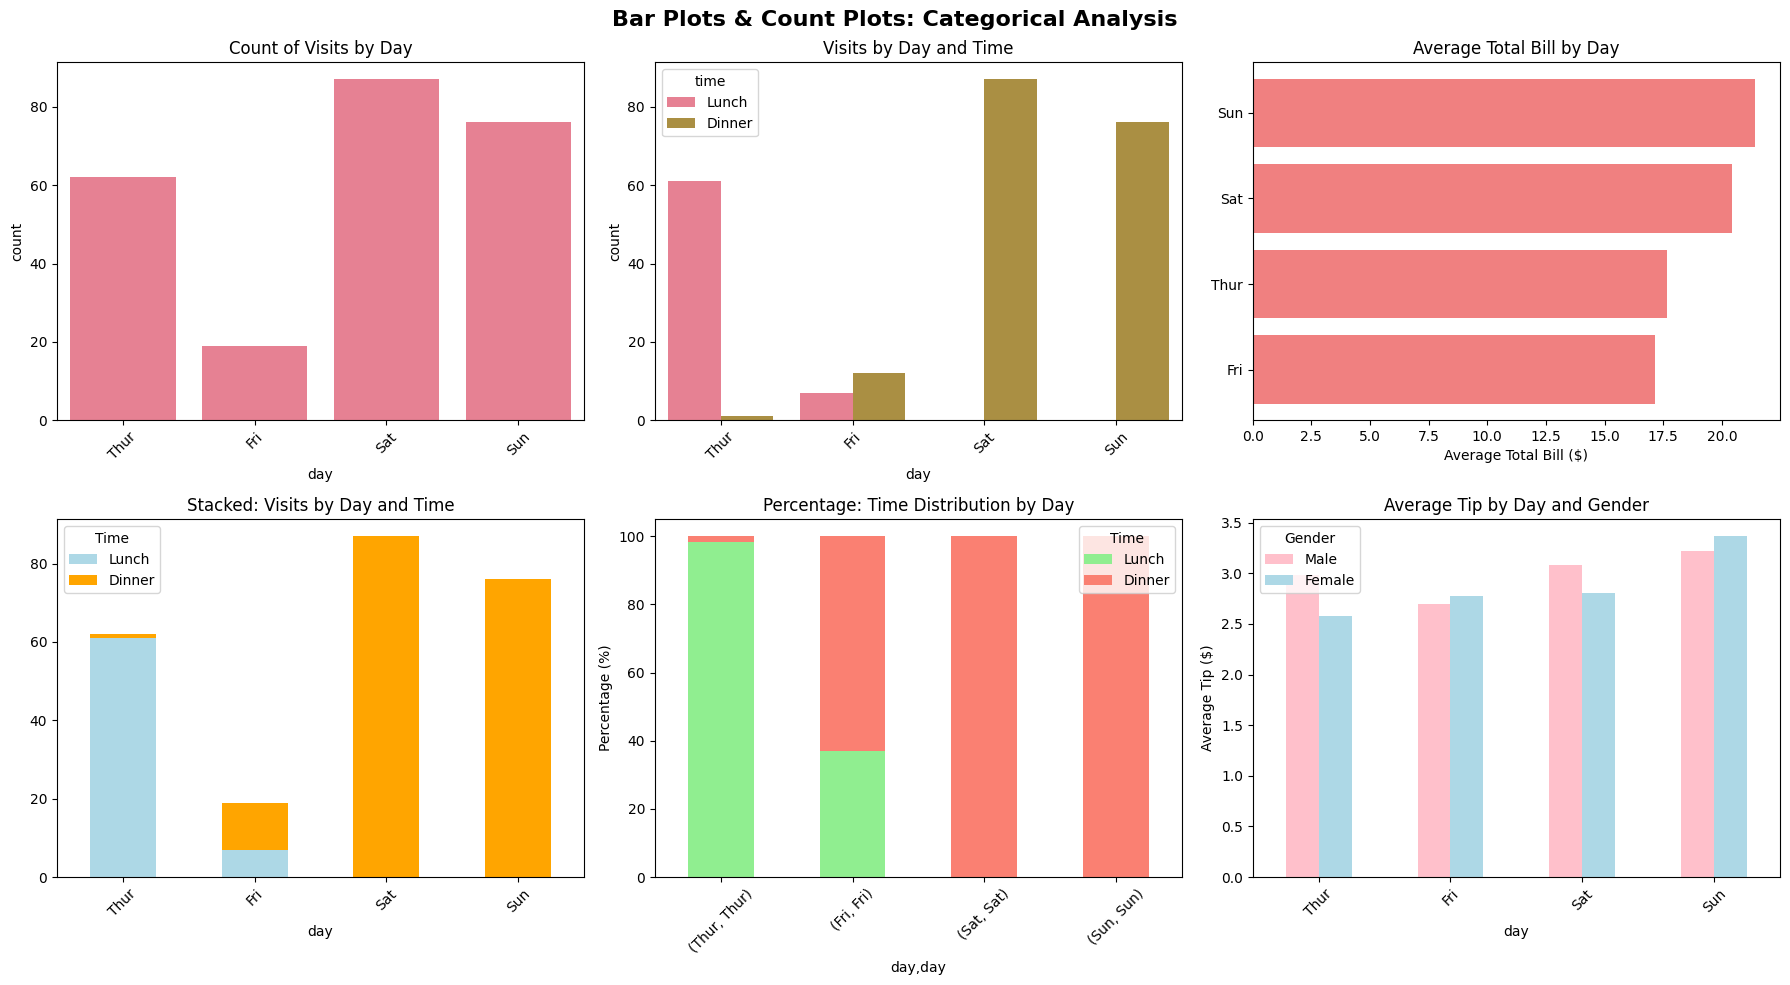

📊 Categorical Analysis Results:
   • Most popular day: Sat (87 visits)
   • Gender distribution: {'Male': np.int64(157), 'Female': np.int64(87)}
   • Time distribution: {'Dinner': np.int64(176), 'Lunch': np.int64(68)}
💡 Bar plots are excellent for comparing categories and showing frequencies
💡 Use grouped/stacked bars to show relationships between multiple categorical variables


In [12]:
### 📊 Bar Plots & Count Plots

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Bar Plots & Count Plots: Categorical Analysis', fontsize=16, fontweight='bold')

# 1. Simple count plot
sns.countplot(data=tips, x='day', ax=axes[0,0])
axes[0,0].set_title('Count of Visits by Day')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Grouped count plot
sns.countplot(data=tips, x='day', hue='time', ax=axes[0,1])
axes[0,1].set_title('Visits by Day and Time')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Horizontal bar plot with mean values
day_stats = tips.groupby('day')['total_bill'].mean().sort_values(ascending=True)
axes[0,2].barh(day_stats.index, day_stats.values, color='lightcoral')
axes[0,2].set_title('Average Total Bill by Day')
axes[0,2].set_xlabel('Average Total Bill ($)')

# 4. Stacked bar plot
day_time_counts = tips.groupby(['day', 'time']).size().unstack()
day_time_counts.plot(kind='bar', stacked=True, ax=axes[1,0], color=['lightblue', 'orange'])
axes[1,0].set_title('Stacked: Visits by Day and Time')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(title='Time')

# 5. Percentage bar plot
day_time_pct = tips.groupby(['day', 'time']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack()
day_time_pct.plot(kind='bar', stacked=True, ax=axes[1,1], color=['lightgreen', 'salmon'])
axes[1,1].set_title('Percentage: Time Distribution by Day')
axes[1,1].set_ylabel('Percentage (%)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title='Time')

# 6. Multiple category comparison
tips_summary = tips.groupby(['day', 'sex'])['tip'].mean().unstack()
tips_summary.plot(kind='bar', ax=axes[1,2], color=['pink', 'lightblue'])
axes[1,2].set_title('Average Tip by Day and Gender')
axes[1,2].set_ylabel('Average Tip ($)')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].legend(title='Gender')

plt.tight_layout()
plt.show()

# Print category statistics
print("📊 Categorical Analysis Results:")
print(f"   • Most popular day: {tips['day'].value_counts().index[0]} ({tips['day'].value_counts().iloc[0]} visits)")
print(f"   • Gender distribution: {dict(tips['sex'].value_counts())}")
print(f"   • Time distribution: {dict(tips['time'].value_counts())}")
print("💡 Bar plots are excellent for comparing categories and showing frequencies")
print("💡 Use grouped/stacked bars to show relationships between multiple categorical variables")

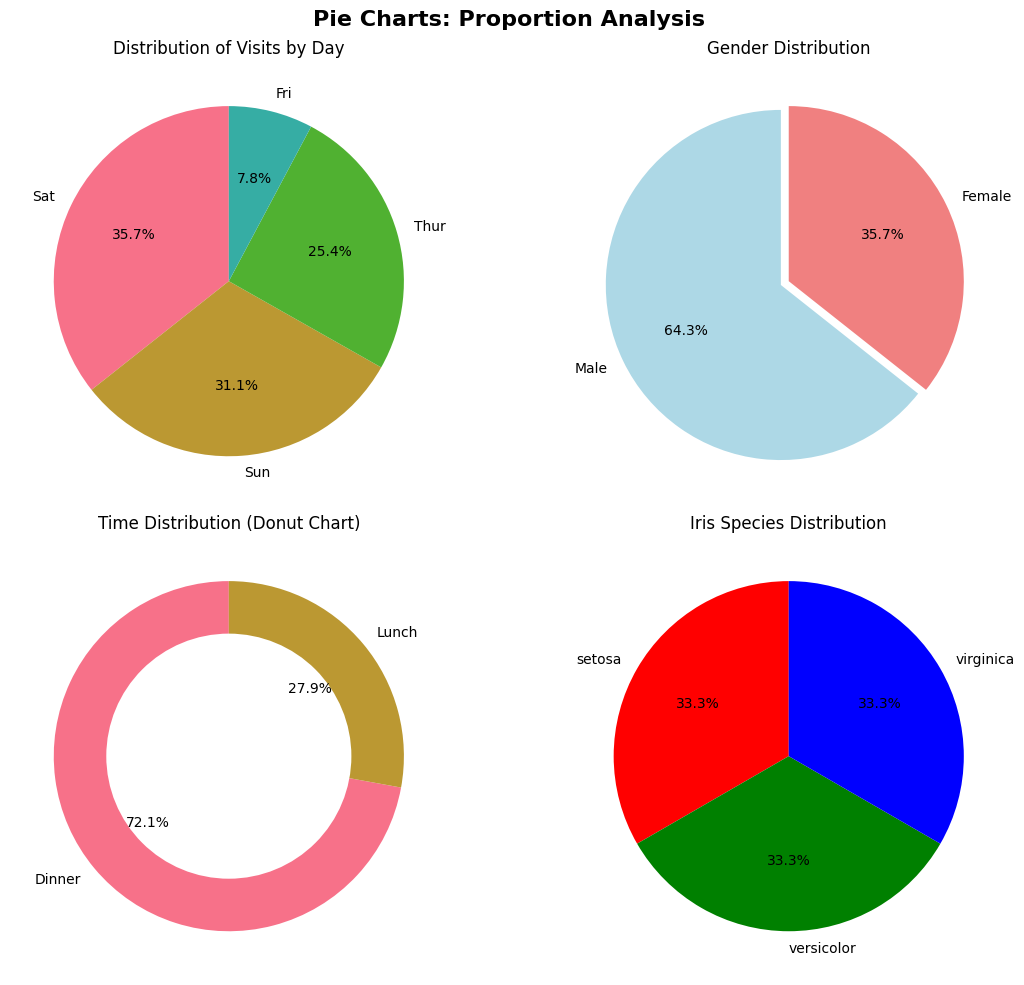

🥧 Pie Charts Analysis:
   • Day distribution: {'Sat': np.int64(87), 'Sun': np.int64(76), 'Thur': np.int64(62), 'Fri': np.int64(19)}
   • Gender split: 64.3% Male, 35.7% Female
⚠️  Pie charts work best with 2-5 categories
💡 Use donut charts to add visual appeal and space for additional information
💡 Consider bar charts for >5 categories or when precise comparison is needed


In [13]:
### 🥧 Pie Charts - Proportions

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Pie Charts: Proportion Analysis', fontsize=16, fontweight='bold')

# 1. Basic pie chart
day_counts = tips['day'].value_counts()
axes[0,0].pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution of Visits by Day')

# 2. Pie chart with custom colors
gender_counts = tips['sex'].value_counts()
colors = ['lightblue', 'lightcoral']
axes[0,1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
              colors=colors, startangle=90, explode=(0.05, 0))
axes[0,1].set_title('Gender Distribution')

# 3. Donut chart
time_counts = tips['time'].value_counts()
wedges, texts, autotexts = axes[1,0].pie(time_counts.values, labels=time_counts.index, 
                                         autopct='%1.1f%%', startangle=90)
# Create donut by adding a white circle in center
centre_circle = plt.Circle((0,0), 0.70, fc='white')
axes[1,0].add_artist(centre_circle)
axes[1,0].set_title('Time Distribution (Donut Chart)')

# 4. Iris species distribution
species_counts = iris['species'].value_counts()
colors = ['red', 'green', 'blue']
wedges, texts, autotexts = axes[1,1].pie(species_counts.values, labels=species_counts.index, 
                                         autopct='%1.1f%%', colors=colors, startangle=90)
axes[1,1].set_title('Iris Species Distribution')

plt.tight_layout()
plt.show()

print("🥧 Pie Charts Analysis:")
print(f"   • Day distribution: {dict(day_counts)}")
print(f"   • Gender split: {gender_counts['Male']/(gender_counts['Male']+gender_counts['Female'])*100:.1f}% Male, {gender_counts['Female']/(gender_counts['Male']+gender_counts['Female'])*100:.1f}% Female")
print("⚠️  Pie charts work best with 2-5 categories")
print("💡 Use donut charts to add visual appeal and space for additional information")
print("💡 Consider bar charts for >5 categories or when precise comparison is needed")

## ⏰ 4. Time Series Analysis Plots

Time series analysis reveals:
- **Trends** over time (increasing, decreasing, stable)
- **Seasonality** and **cyclical patterns**
- **Anomalies** and **outliers**
- **Multiple series comparisons**

### 🎯 When to use each plot:
- **Line plots**: Show trends over time and temporal patterns
- **Area plots**: Show stacked trends and cumulative values over time

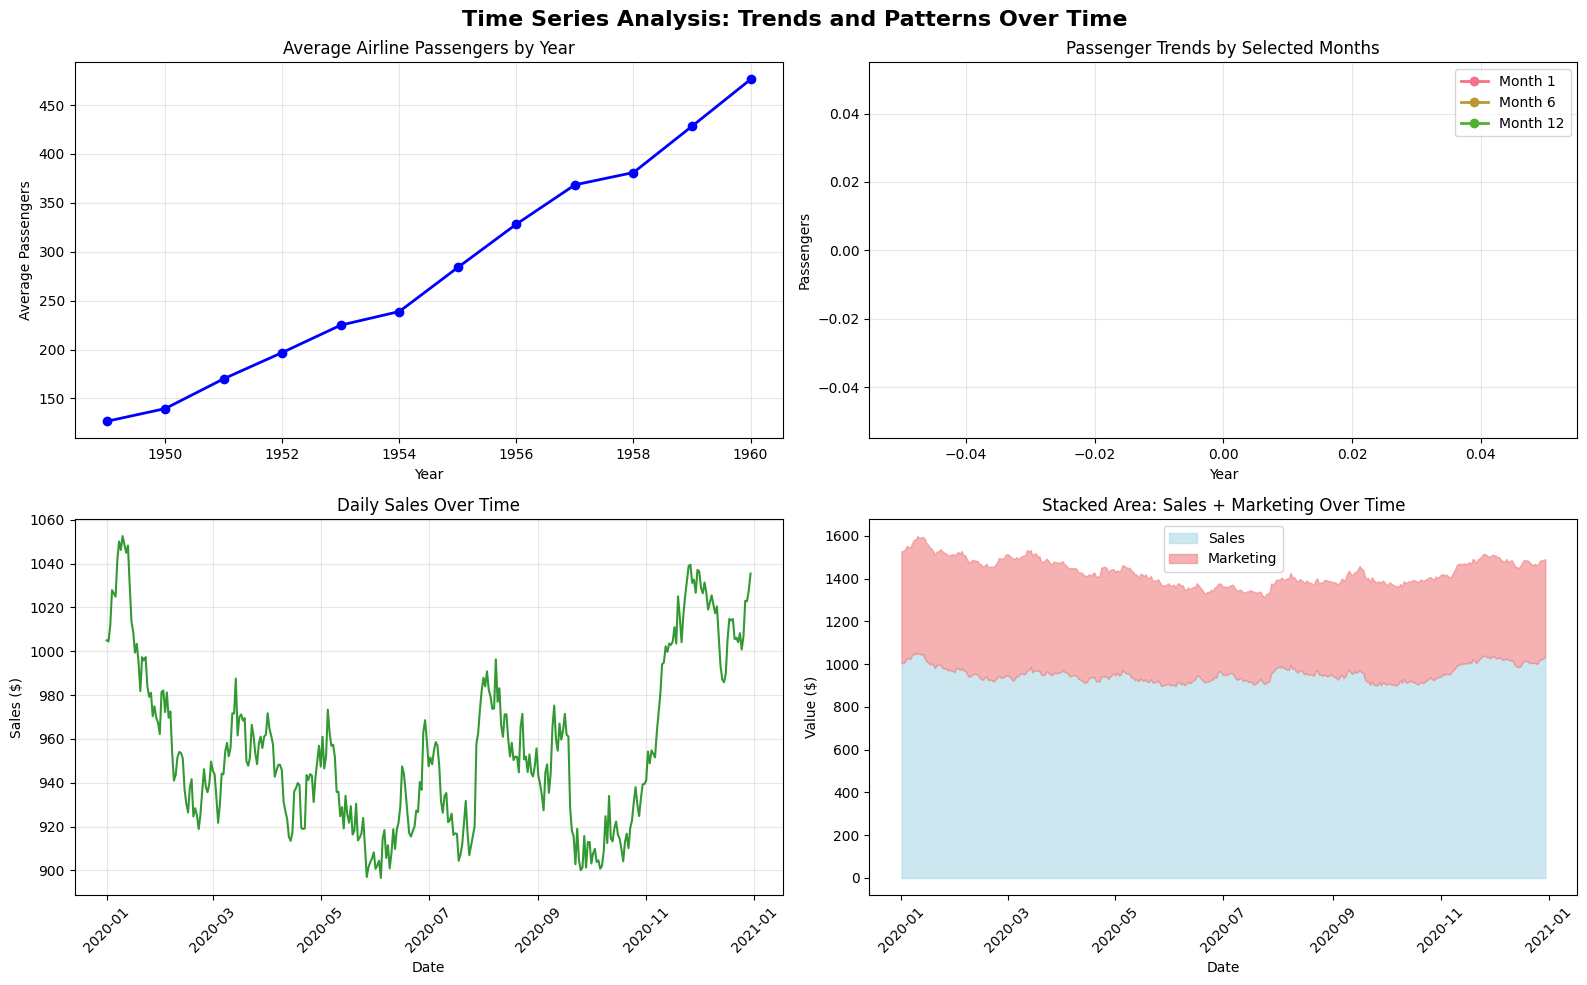

📈 Time Series Analysis Results:
   • Sales trend: +30.48 over the year
   • Average daily sales: $955.59
   • Sales volatility (std): $37.85
💡 Line plots reveal trends, seasonality, and anomalies in time-based data
💡 Area plots are great for showing cumulative values and proportions over time


In [14]:
### 📈 Line Plots & Area Plots - Time Series

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Time Series Analysis: Trends and Patterns Over Time', fontsize=16, fontweight='bold')

# 1. Basic line plot - Flights dataset
flights_pivot = flights.pivot(index='year', columns='month', values='passengers')
axes[0,0].plot(flights_pivot.index, flights_pivot.mean(axis=1), marker='o', linewidth=2, color='blue')
axes[0,0].set_title('Average Airline Passengers by Year')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Average Passengers')
axes[0,0].grid(True, alpha=0.3)

# 2. Multiple line plot - Monthly trends
for month in [1, 6, 12]:  # Jan, Jun, Dec
    month_data = flights[flights['month'] == month]
    axes[0,1].plot(month_data['year'], month_data['passengers'], 
                   marker='o', label=f'Month {month}', linewidth=2)
axes[0,1].set_title('Passenger Trends by Selected Months')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Passengers')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Custom time series - Daily sales
axes[1,0].plot(ts_data['date'], ts_data['sales'], color='green', linewidth=1.5, alpha=0.8)
axes[1,0].set_title('Daily Sales Over Time')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Sales ($)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 4. Area plot - Stacked time series
axes[1,1].fill_between(ts_data['date'], 0, ts_data['sales'], alpha=0.6, color='lightblue', label='Sales')
axes[1,1].fill_between(ts_data['date'], ts_data['sales'], 
                       ts_data['sales'] + ts_data['marketing'], 
                       alpha=0.6, color='lightcoral', label='Marketing')
axes[1,1].set_title('Stacked Area: Sales + Marketing Over Time')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Value ($)')
axes[1,1].legend()
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create an interactive time series plot with Plotly
fig_plotly = go.Figure()

# Add sales line
fig_plotly.add_trace(go.Scatter(
    x=ts_data['date'], 
    y=ts_data['sales'],
    mode='lines',
    name='Sales',
    line=dict(color='blue', width=2)
))

# Add marketing line
fig_plotly.add_trace(go.Scatter(
    x=ts_data['date'], 
    y=ts_data['marketing'],
    mode='lines',
    name='Marketing',
    line=dict(color='red', width=2)
))

fig_plotly.update_layout(
    title='Interactive Time Series: Sales vs Marketing',
    xaxis_title='Date',
    yaxis_title='Value ($)',
    hovermode='x unified',
    width=800,
    height=400
)

fig_plotly.show()

print("📈 Time Series Analysis Results:")
print(f"   • Sales trend: {ts_data['sales'].iloc[-1] - ts_data['sales'].iloc[0]:+.2f} over the year")
print(f"   • Average daily sales: ${ts_data['sales'].mean():.2f}")
print(f"   • Sales volatility (std): ${ts_data['sales'].std():.2f}")
print("💡 Line plots reveal trends, seasonality, and anomalies in time-based data")
print("💡 Area plots are great for showing cumulative values and proportions over time")

## 📊 5. Distribution & Skewness Analysis

Understanding data distributions is crucial for:
- **Choosing appropriate statistical tests**
- **Selecting machine learning algorithms**
- **Data transformation decisions**
- **Identifying data quality issues**

### 🎯 Key Concepts:
- **Distribution Types**: Normal, uniform, skewed, bimodal
- **Skewness Measurement**: Right skewed (positive), Left skewed (negative), Symmetric
- **Skewness Values**: -0.5 to 0.5 (symmetric), ±0.5 to ±1 (moderate), >±1 (high)
- **Normality Testing**: Shapiro-Wilk, Kolmogorov-Smirnov, Q-Q plots

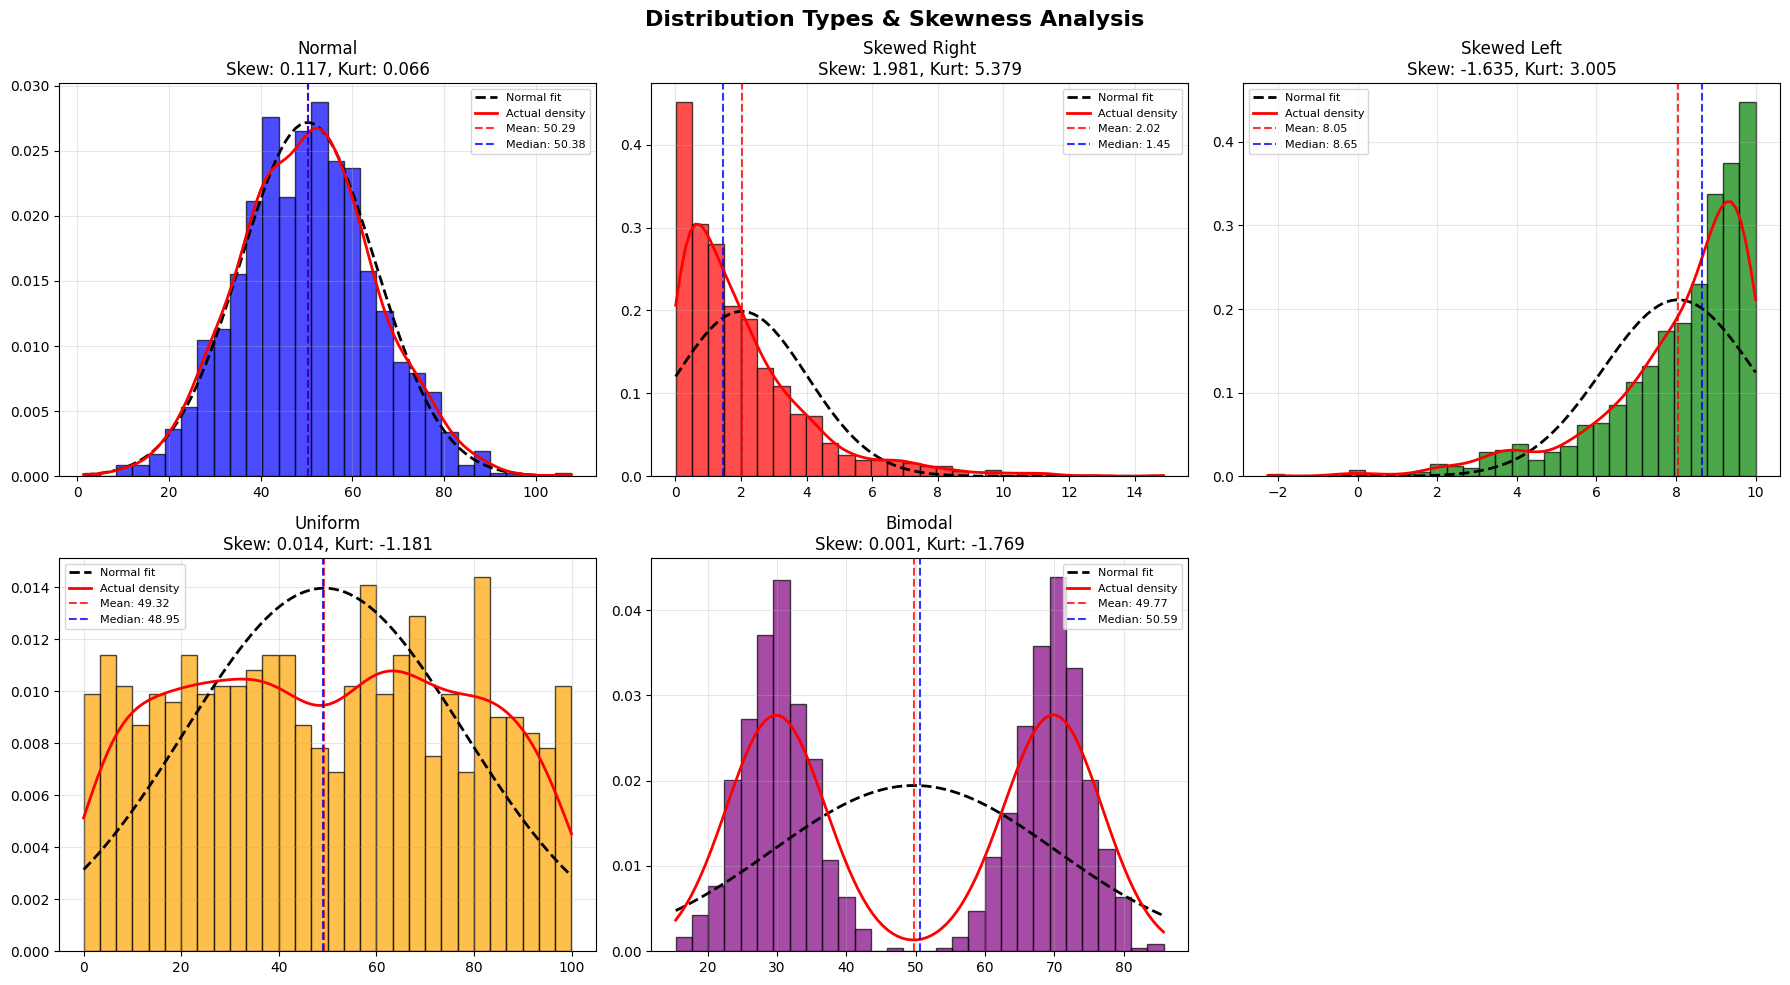

📊 Distribution Analysis Summary:
Normal          | Skew:  0.117 (Symmetric, right)
                | Mean:  50.29, Median:  50.38, Kurtosis:  0.066
------------------------------------------------------------
Skewed Right    | Skew:  1.981 (High skew, right)
                | Mean:   2.02, Median:   1.45, Kurtosis:  5.379
------------------------------------------------------------
Skewed Left     | Skew: -1.635 (High skew, left)
                | Mean:   8.05, Median:   8.65, Kurtosis:  3.005
------------------------------------------------------------
Uniform         | Skew:  0.014 (Symmetric, right)
                | Mean:  49.32, Median:  48.95, Kurtosis: -1.181
------------------------------------------------------------
Bimodal         | Skew:  0.001 (Symmetric, right)
                | Mean:  49.77, Median:  50.59, Kurtosis: -1.769
------------------------------------------------------------


In [15]:
### 📊 Distribution Types Analysis

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution Types & Skewness Analysis', fontsize=16, fontweight='bold')

distributions = ['normal', 'skewed_right', 'skewed_left', 'uniform', 'bimodal']
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i, (dist_name, color) in enumerate(zip(distributions, colors)):
    row = i // 3
    col = i % 3
    
    data = dist_data[dist_name]
    
    # Histogram with density curve
    axes[row, col].hist(data, bins=30, density=True, alpha=0.7, color=color, edgecolor='black')
    
    # Add fitted normal curve for comparison
    mu, sigma = stats.norm.fit(data)
    x = np.linspace(data.min(), data.max(), 100)
    axes[row, col].plot(x, stats.norm.pdf(x, mu, sigma), 'k--', linewidth=2, label='Normal fit')
    
    # Add actual density curve
    axes[row, col].plot(x, stats.gaussian_kde(data)(x), color='red', linewidth=2, label='Actual density')
    
    # Calculate statistics
    mean_val = np.mean(data)
    median_val = np.median(data)
    skewness = skew(data)
    kurtosis_val = kurtosis(data)
    
    axes[row, col].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
    axes[row, col].axvline(median_val, color='blue', linestyle='--', alpha=0.8, label=f'Median: {median_val:.2f}')
    
    axes[row, col].set_title(f'{dist_name.replace("_", " ").title()}\nSkew: {skewness:.3f}, Kurt: {kurtosis_val:.3f}')
    axes[row, col].legend(fontsize=8)
    axes[row, col].grid(True, alpha=0.3)

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

# Statistical summary
print("📊 Distribution Analysis Summary:")
print("=" * 60)
for dist_name in distributions:
    data = dist_data[dist_name]
    skewness = skew(data)
    kurtosis_val = kurtosis(data)
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    if abs(skewness) < 0.5:
        skew_type = "Symmetric"
    elif abs(skewness) < 1:
        skew_type = "Moderate skew"
    else:
        skew_type = "High skew"
    
    direction = "right" if skewness > 0 else "left" if skewness < 0 else "none"
    
    print(f"{dist_name.replace('_', ' ').title():15} | Skew: {skewness:6.3f} ({skew_type}, {direction})")
    print(f"{'':15} | Mean: {mean_val:6.2f}, Median: {median_val:6.2f}, Kurtosis: {kurtosis_val:6.3f}")
    print("-" * 60)

🧪 Normality Test Results:
Distribution    Shapiro-Wilk    K-S Test        Visual Assessment
--------------------------------------------------------------------------------
Normal          Normal          Normal          Normal
p-values:       0.627258        0.741299        R²=0.9992
--------------------------------------------------------------------------------
Skewed Right    Not Normal      Not Normal      Not Normal
p-values:       0.000000        0.000000        R²=0.9027
--------------------------------------------------------------------------------
Skewed Left     Not Normal      Not Normal      Not Normal
p-values:       0.000000        0.000000        R²=0.9159
--------------------------------------------------------------------------------
Uniform         Not Normal      Not Normal      Not Normal
p-values:       0.000000        0.000939        R²=0.9792
--------------------------------------------------------------------------------
Bimodal         Not Normal      Not Nor

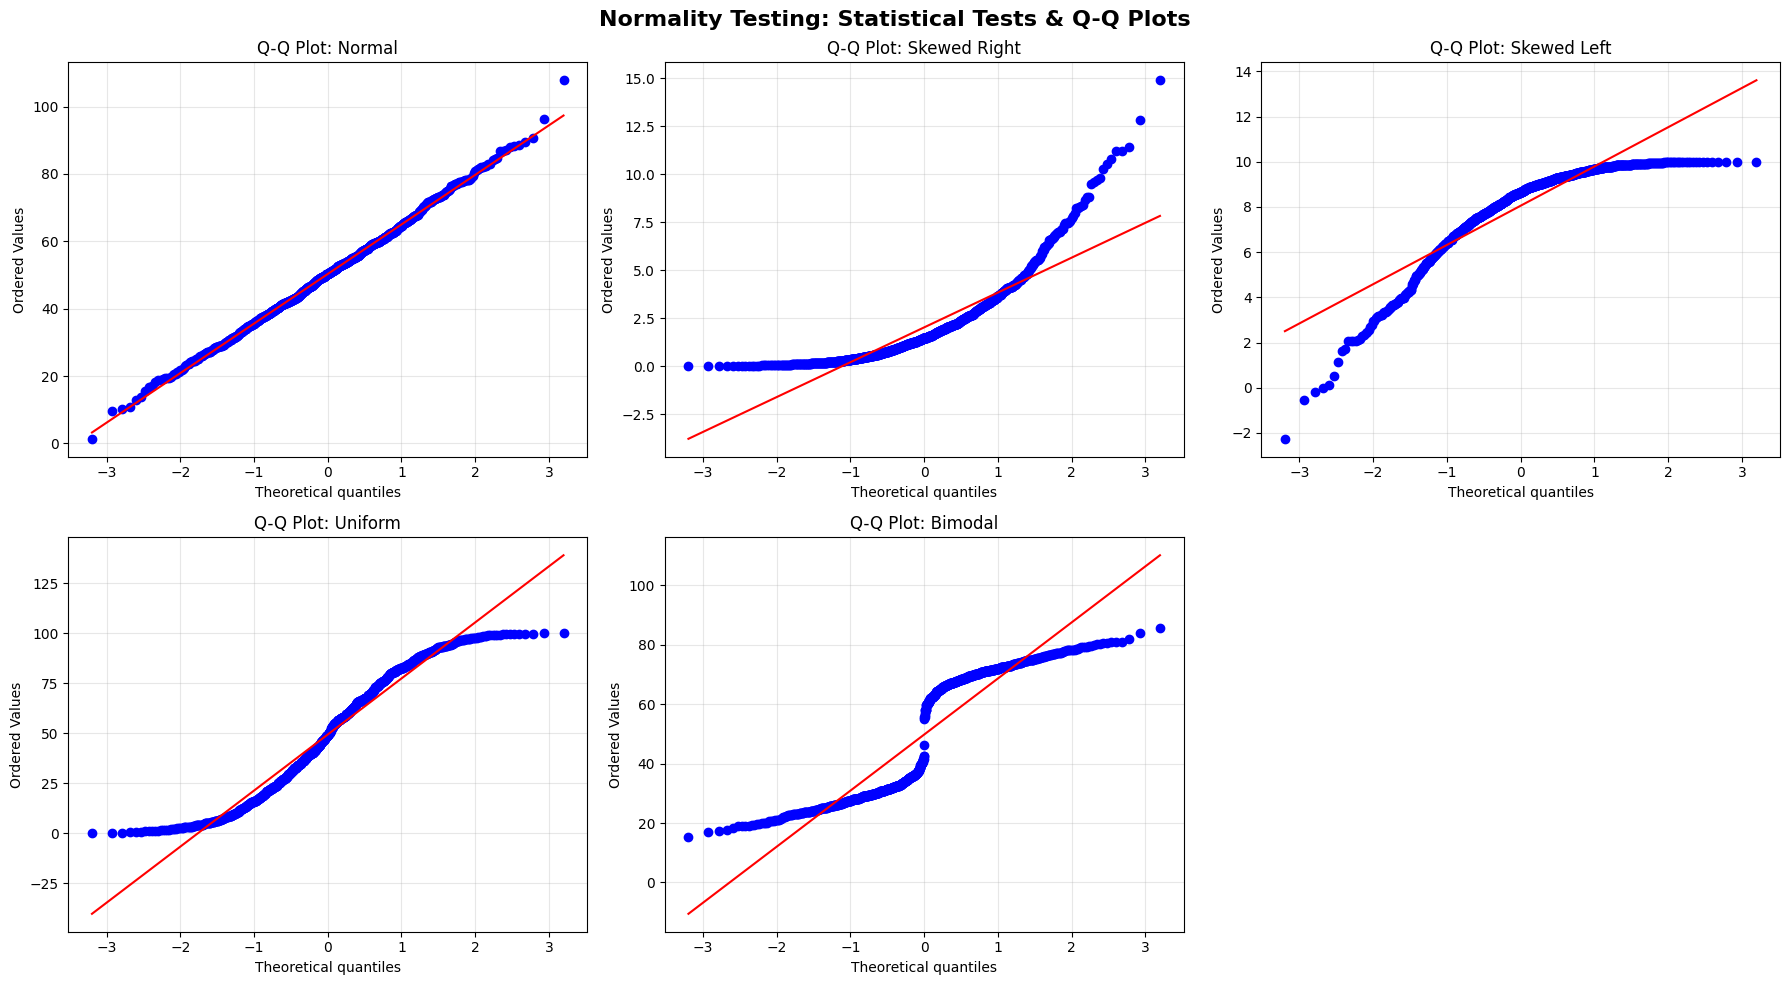


📋 Normality Assessment Guidelines:
✅ NORMAL if:
   • Shapiro-Wilk p-value > 0.05
   • Kolmogorov-Smirnov p-value > 0.05
   • Q-Q plot points follow straight line (R² > 0.98)
   • Skewness between -0.5 and 0.5

❌ NOT NORMAL if:
   • Any test p-value ≤ 0.05
   • Q-Q plot shows curved pattern
   • |Skewness| > 1.0

💡 Use multiple methods - statistical tests can be sensitive to sample size!
💡 For large samples (n>5000), rely more on visual inspection and effect size


In [16]:
### 🧪 Normality Testing & Q-Q Plots

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Normality Testing: Statistical Tests & Q-Q Plots', fontsize=16, fontweight='bold')

print("🧪 Normality Test Results:")
print("=" * 80)
print(f"{'Distribution':<15} {'Shapiro-Wilk':<15} {'K-S Test':<15} {'Visual Assessment'}")
print("-" * 80)

for i, dist_name in enumerate(distributions):
    row = i // 3
    col = i % 3
    
    data = dist_data[dist_name]
    
    # Create Q-Q plot
    stats.probplot(data, dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f'Q-Q Plot: {dist_name.replace("_", " ").title()}')
    axes[row, col].grid(True, alpha=0.3)
    
    # Perform normality tests
    # Shapiro-Wilk test (good for small samples)
    shapiro_stat, shapiro_p = stats.shapiro(data[:5000] if len(data) > 5000 else data)
    
    # Kolmogorov-Smirnov test
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    
    # Interpret results
    shapiro_result = "Normal" if shapiro_p > 0.05 else "Not Normal"
    ks_result = "Normal" if ks_p > 0.05 else "Not Normal"
    
    # Visual assessment based on Q-Q plot linearity
    # Calculate R-squared of Q-Q plot
    theoretical_quantiles = stats.probplot(data, dist="norm")[0][0]
    sample_quantiles = stats.probplot(data, dist="norm")[0][1]
    correlation = np.corrcoef(theoretical_quantiles, sample_quantiles)[0, 1]
    visual_result = "Normal" if correlation > 0.98 else "Not Normal"
    
    print(f"{dist_name.replace('_', ' ').title():<15} {shapiro_result:<15} {ks_result:<15} {visual_result}")
    print(f"{'p-values:':<15} {shapiro_p:.6f}        {ks_p:.6f}        R²={correlation:.4f}")
    print("-" * 80)

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

# Additional normality assessment
print("\n📋 Normality Assessment Guidelines:")
print("=" * 50)
print("✅ NORMAL if:")
print("   • Shapiro-Wilk p-value > 0.05")
print("   • Kolmogorov-Smirnov p-value > 0.05") 
print("   • Q-Q plot points follow straight line (R² > 0.98)")
print("   • Skewness between -0.5 and 0.5")
print("\n❌ NOT NORMAL if:")
print("   • Any test p-value ≤ 0.05")
print("   • Q-Q plot shows curved pattern")
print("   • |Skewness| > 1.0")
print("\n💡 Use multiple methods - statistical tests can be sensitive to sample size!")
print("💡 For large samples (n>5000), rely more on visual inspection and effect size")

## 🔥 6. Advanced Correlation Matrix Visualization

Correlation analysis reveals:
- **Linear relationships** between variables
- **Multicollinearity** issues
- **Feature selection** insights
- **Data patterns** and **dependencies**

### 🎯 Correlation Interpretation:
- **|r| > 0.7**: Strong correlation
- **0.3 < |r| < 0.7**: Moderate correlation  
- **|r| < 0.3**: Weak correlation
- **r > 0**: Positive correlation
- **r < 0**: Negative correlation

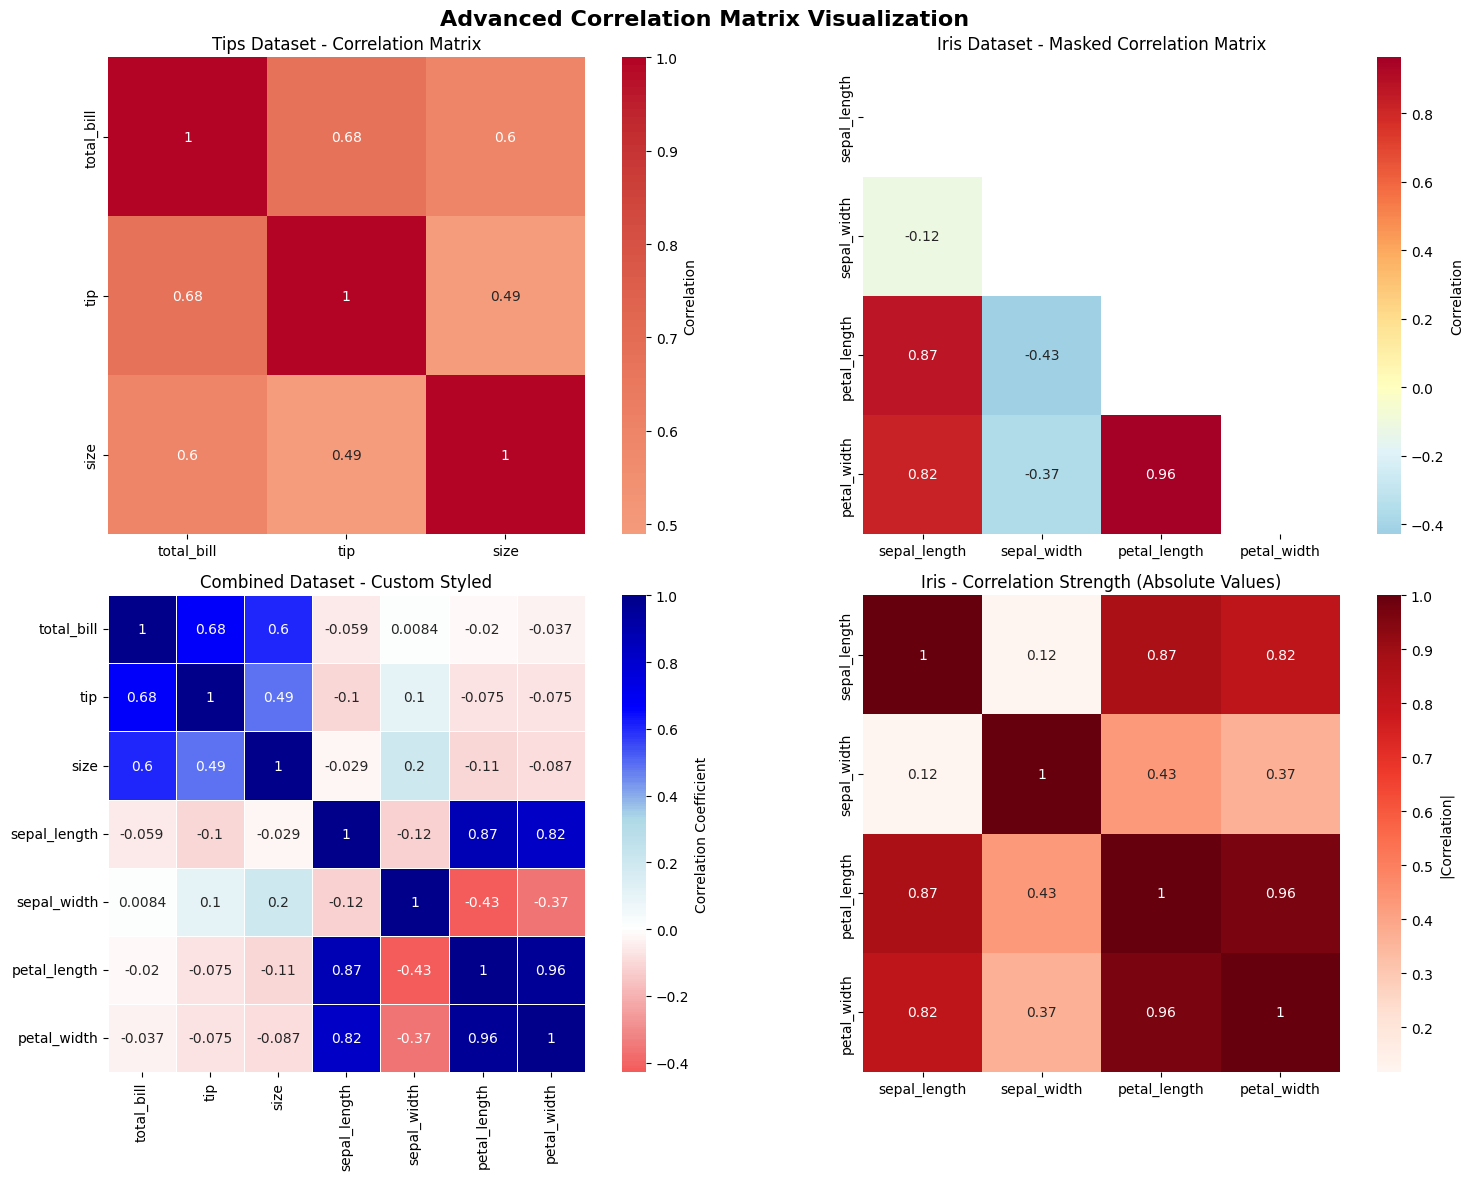

🔥 Correlation Analysis Summary:

📊 Tips Dataset Correlations:
• total_bill ↔ tip: 0.676 (Moderate Positive)
• total_bill ↔ size: 0.598 (Moderate Positive)
• tip ↔ size: 0.489 (Moderate Positive)

🌸 Iris Dataset Correlations:
• sepal_length ↔ petal_length: 0.872 (Strong Positive)
• sepal_length ↔ petal_width: 0.818 (Strong Positive)
• sepal_width ↔ petal_length: -0.428 (Moderate Negative)
• sepal_width ↔ petal_width: -0.366 (Moderate Negative)
• petal_length ↔ petal_width: 0.963 (Strong Positive)

💡 Key Insights:
• Use correlation matrices to identify multicollinearity in ML models
• Strong correlations (|r| > 0.7) may indicate redundant features
• Interactive heatmaps allow detailed exploration of relationships


In [17]:
### 🔥 Advanced Correlation Heatmaps

# Prepare correlation matrices
tips_numeric = tips.select_dtypes(include=[np.number])
iris_numeric = iris.select_dtypes(include=[np.number])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Advanced Correlation Matrix Visualization', fontsize=16, fontweight='bold')

# 1. Basic correlation heatmap
corr_tips = tips_numeric.corr()
sns.heatmap(corr_tips, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0,0], cbar_kws={'label': 'Correlation'})
axes[0,0].set_title('Tips Dataset - Correlation Matrix')

# 2. Masked correlation heatmap (hide upper triangle)
corr_iris = iris_numeric.corr()
mask = np.triu(np.ones_like(corr_iris, dtype=bool))
sns.heatmap(corr_iris, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, ax=axes[0,1], cbar_kws={'label': 'Correlation'})
axes[0,1].set_title('Iris Dataset - Masked Correlation Matrix')

# 3. Custom styled heatmap
corr_combined = pd.concat([tips_numeric, iris_numeric], axis=1).corr()
# Create custom colormap
colors = ['darkred', 'red', 'lightcoral', 'white', 'lightblue', 'blue', 'darkblue']
n_bins = 100
cmap = sns.blend_palette(colors, n_colors=n_bins, as_cmap=True)

sns.heatmap(corr_combined, annot=True, cmap=cmap, center=0, 
            square=True, ax=axes[1,0], 
            linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
axes[1,0].set_title('Combined Dataset - Custom Styled')

# 4. Correlation strength heatmap (absolute values)
corr_abs = np.abs(corr_iris)
sns.heatmap(corr_abs, annot=True, cmap='Reds', 
            square=True, ax=axes[1,1], cbar_kws={'label': '|Correlation|'})
axes[1,1].set_title('Iris - Correlation Strength (Absolute Values)')

plt.tight_layout()
plt.show()

# Interactive correlation heatmap with Plotly
fig_interactive = px.imshow(corr_iris.values,
                           labels=dict(x="Features", y="Features", color="Correlation"),
                           x=corr_iris.columns,
                           y=corr_iris.columns,
                           color_continuous_scale='RdBu_r',
                           aspect="auto",
                           title="Interactive Correlation Matrix - Iris Dataset")

# Add correlation values as text
for i in range(len(corr_iris.columns)):
    for j in range(len(corr_iris.columns)):
        fig_interactive.add_annotation(
            x=i, y=j,
            text=str(round(corr_iris.iloc[j, i], 3)),
            showarrow=False,
            font=dict(color="white" if abs(corr_iris.iloc[j, i]) > 0.5 else "black")
        )

fig_interactive.show()

# Correlation analysis summary
print("🔥 Correlation Analysis Summary:")
print("=" * 60)

# Tips dataset analysis
print("\n📊 Tips Dataset Correlations:")
strong_corr_tips = []
for i in range(len(corr_tips.columns)):
    for j in range(i+1, len(corr_tips.columns)):
        corr_val = corr_tips.iloc[i, j]
        if abs(corr_val) > 0.3:  # Moderate or strong correlation
            strength = "Strong" if abs(corr_val) > 0.7 else "Moderate"
            direction = "Positive" if corr_val > 0 else "Negative"
            strong_corr_tips.append((corr_tips.columns[i], corr_tips.columns[j], corr_val, strength, direction))

for var1, var2, corr_val, strength, direction in strong_corr_tips:
    print(f"• {var1} ↔ {var2}: {corr_val:.3f} ({strength} {direction})")

# Iris dataset analysis  
print("\n🌸 Iris Dataset Correlations:")
strong_corr_iris = []
for i in range(len(corr_iris.columns)):
    for j in range(i+1, len(corr_iris.columns)):
        corr_val = corr_iris.iloc[i, j]
        if abs(corr_val) > 0.3:
            strength = "Strong" if abs(corr_val) > 0.7 else "Moderate"
            direction = "Positive" if corr_val > 0 else "Negative"
            strong_corr_iris.append((corr_iris.columns[i], corr_iris.columns[j], corr_val, strength, direction))

for var1, var2, corr_val, strength, direction in strong_corr_iris:
    print(f"• {var1} ↔ {var2}: {corr_val:.3f} ({strength} {direction})")

print("\n💡 Key Insights:")
print("• Use correlation matrices to identify multicollinearity in ML models")
print("• Strong correlations (|r| > 0.7) may indicate redundant features")
print("• Interactive heatmaps allow detailed exploration of relationships")

## 🎯 Summary & Best Practices

### 📈 Visualization Selection Guide

| **Data Type** | **Purpose** | **Best Plots** | **When to Use** |
|---------------|-------------|----------------|-----------------|
| **Single Numerical** | Distribution | Histogram, Box plot, Violin plot | Understand data shape, outliers |
| **Two Numerical** | Relationship | Scatter plot, Joint plot | Explore correlations, patterns |
| **Multiple Numerical** | Relationships | Pair plot, Correlation heatmap | Multi-variable analysis |
| **Categorical** | Frequencies | Bar plot, Count plot, Pie chart | Compare categories |
| **Time Series** | Trends | Line plot, Area plot | Temporal patterns |
| **Mixed Types** | Comparisons | Grouped plots, Facet grids | Category-wise analysis |

### 🎨 Design Best Practices

1. **Color Usage**
   - Use colorblind-friendly palettes
   - Maintain consistency across plots
   - Use color meaningfully (not just for decoration)

2. **Plot Clarity**
   - Always label axes and add titles
   - Include legends when necessary
   - Use appropriate font sizes
   - Add grid lines for readability

3. **Statistical Accuracy**
   - Show uncertainty when appropriate
   - Use proper scales (don't manipulate y-axis to mislead)
   - Include sample sizes in titles/captions

4. **Interactive Elements**
   - Use Plotly for interactive exploration
   - Add hover information
   - Enable zooming and panning for large datasets

### 🚀 Next Steps in EDA

1. **Advanced Techniques**
   - Principal Component Analysis (PCA)
   - t-SNE for high-dimensional data
   - Parallel coordinates plots
   - Radar charts for multivariate comparisons

2. **Statistical Testing**
   - Hypothesis testing
   - ANOVA for group comparisons
   - Chi-square tests for categorical associations

3. **Feature Engineering**
   - Create new features based on EDA insights
   - Handle skewed distributions with transformations
   - Engineer temporal features from time series

---

**📚 Remember**: EDA is an iterative process. Use these visualizations to:
- **Understand** your data thoroughly
- **Identify** patterns and anomalies  
- **Guide** preprocessing decisions
- **Inform** model selection
- **Communicate** findings effectively

**🎯 The goal of EDA is not just to create beautiful plots, but to gain actionable insights that drive better data science decisions!**